# Requirements

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(
    style="whitegrid", 
    font_scale = 2, 
    rc={'figure.figsize':(6,9)}
)

# Visualize

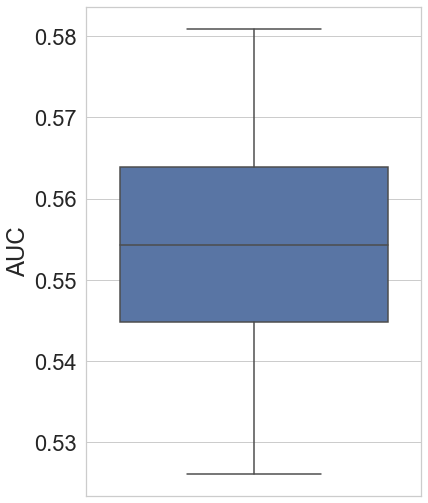

In [15]:
data = pd.read_csv("/Users/pavelpopov/courses/Advanced_Machine_Learning/project/phraseology/logs/221204.191914-experiment-mlp-balanced_all/runs.csv")

ax = sns.boxplot(y="test_score",
            data=data)
ax.set(ylabel='AUC')
plt.savefig(
    "./mlp.png",
    format="png",
    dpi=300,
    bbox_inches='tight',
)

In [36]:
data = pd.read_csv("/Users/pavelpopov/courses/Advanced_Machine_Learning/project/phraseology/logs/221204.191914-experiment-mlp-balanced_all/runs.csv")
auc = data["test_score"].to_numpy()
acc = data["test_accuracy"].to_numpy()

acc_data = pd.DataFrame({
    "Metric": ["Accuracy"] * acc.shape[0],
    "Score": acc
})
auc_data = pd.DataFrame({
    "Metric": ["AUC"] * auc.shape[0],
    "Score": auc
})

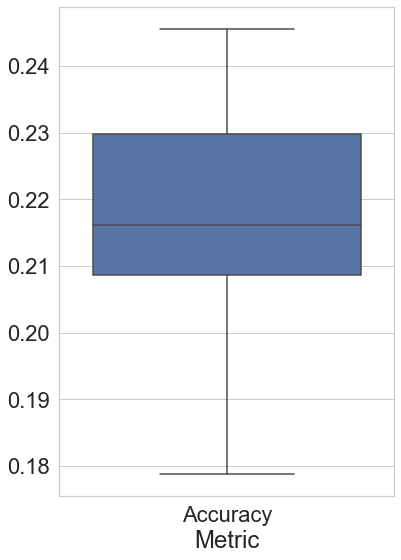

In [37]:
ax = sns.boxplot(y="Score", x="Metric",
            data=acc_data) 
ax.set(ylabel='')
plt.savefig(
    "./mlp_acc.png",
    format="png",
    dpi=300,
    bbox_inches='tight',
)

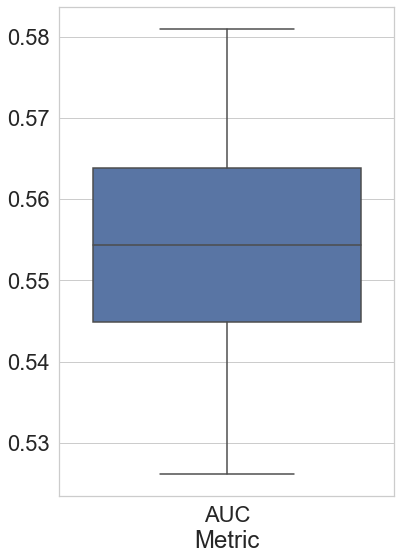

In [38]:
ax = sns.boxplot(y="Score", x="Metric",
            data=auc_data) 
ax.set(ylabel='')
plt.savefig(
    "./mlp_auc.png",
    format="png",
    dpi=300,
    bbox_inches='tight',
)

# Confusion matrix

In [2]:
path = "../logs/221204.191914-experiment-mlp-balanced_all/"

true_labels = []
pred_labels = []
for k in range(5):
    for trial in range(10):
        trial_path = path + f"k_{k}/{trial:04d}/confusion_matrix_data.npz"
        result = np.load(trial_path, allow_pickle=True)
        true_labels.append(result['y_true'])
        pred_labels.append(result['y_pred'])


true_labels = np.hstack(true_labels)
pred_labels = np.hstack(pred_labels)

print(true_labels.shape)
print(pred_labels.shape)

(39110,)
(39110,)


In [46]:
b = np.zeros((pred_labels.shape[0], pred_labels.max() + 1))
b[np.arange(pred_labels.shape[0]), pred_labels] = 1

pred_labels = np.sum(b, axis=0)

b = np.zeros((true_labels.shape[0], true_labels.max() + 1))
b[np.arange(true_labels.shape[0]), true_labels] = 1

true_labels = np.sum(b, axis=0)

print(pred_labels)
print(true_labels)

[  30.   10. 6203. 6527. 6805. 8123. 8630. 2627.  155.]
[  100.   110.  3500.  7720. 11530.  9290.  5530.  1080.   250.]


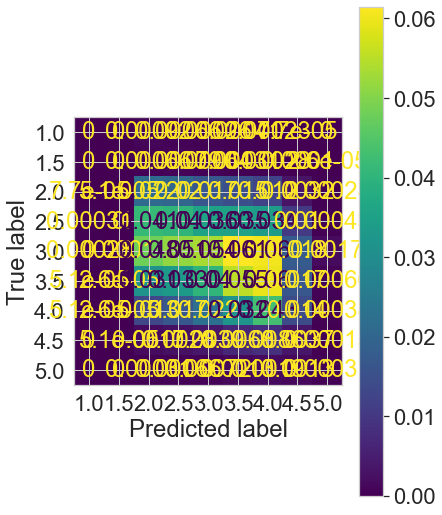

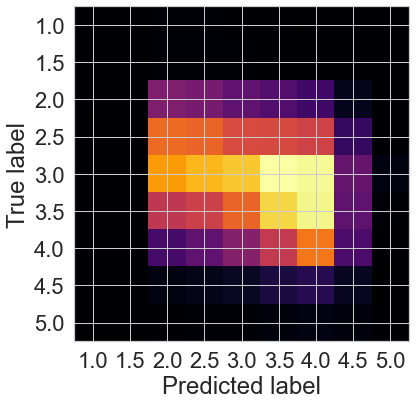

In [8]:
# from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
# sns.set_theme(
#     style="whitegrid", 
#     font_scale = 2, 
#     rc={'figure.figsize':(12,12)}
# )
# confusion_matrix(true_labels, pred_labels)

display_labels=["1.0", "1.5", "2.0", "2.5", "3.0", "3.5", "4.0", "4.5", "5.0"]

ConfusionMatrixDisplay.from_predictions(
    true_labels, pred_labels, normalize='all', display_labels=display_labels, normalize='true'
).plot(include_values=False, colorbar=False, cmap="inferno")

plt.savefig(
    "./mlp_cf.png",
    format="png",
    dpi=300,
    bbox_inches='tight',
)

# RegBert confusion matrix

In [21]:
path = "/Users/pavelpopov/courses/Advanced_Machine_Learning/project/phraseology/logs/test1-experiment-regbert_sec-regression/"

true_labels = []
pred_labels = []
for k in range(1):
    for trial in range(1):
        trial_path = path + f"k_{k}/{trial:04d}/confusion_matrix_data.npz"
        result = np.load(trial_path, allow_pickle=True)
        true_labels.append(result['y_true'])
        pred_labels.append(result['y_score'])


true_labels = np.hstack(true_labels)
pred_labels = np.hstack(pred_labels)

print(true_labels.shape)
print(pred_labels.shape)

# print(pred_labels[1:300])

(780,)
(780, 1)
[[3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.1803272]
 [3.18032

In [22]:
new_true_labels = []
new_pred_labels = []

for label in true_labels:
    new_true_labels += [f"{label:0.1f}"]

for i in range(pred_labels.shape[0]):
    if pred_labels[i] < 1.25:
        new_pred_labels.append("1.0")
    elif pred_labels[i] > 1.25 and pred_labels[i] < 1.75:
        new_pred_labels.append("1.5")
    elif pred_labels[i] > 1.75 and pred_labels[i] < 2.25:
        new_pred_labels.append("2.0")
    elif pred_labels[i] > 2.25 and pred_labels[i] < 2.75:
        new_pred_labels.append("2.5")
    elif pred_labels[i] > 2.75 and pred_labels[i] < 3.25:
        new_pred_labels.append("3.0")
    elif pred_labels[i] > 3.25 and pred_labels[i] < 3.75:
        new_pred_labels.append("3.5")
    elif pred_labels[i] > 3.75 and pred_labels[i] < 4.25:
        new_pred_labels.append("4.0")
    elif pred_labels[i] > 4.25 and pred_labels[i] < 4.75:
        new_pred_labels.append("4.5")
    else: 
        new_pred_labels.append("5.0")


print(new_true_labels[0:20])   
print(new_pred_labels[0:20])   

['2.5', '4.0', '4.0', '4.0', '2.5', '4.0', '2.0', '2.0', '4.0', '3.5', '3.0', '2.5', '2.0', '3.0', '3.5', '2.5', '3.0', '3.0', '2.5', '3.5']
['3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0']


In [24]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(new_true_labels, new_pred_labels)
print(cf_matrix)

[[  0   0   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0   0   0]
 [  0   0   0   0  70   0   0   0   0]
 [  0   0   0   0 154   0   0   0   0]
 [  0   0   0   0 229   0   0   0   0]
 [  0   0   0   0 186   0   0   0   0]
 [  0   0   0   0 111   0   0   0   0]
 [  0   0   0   0  21   0   0   0   0]
 [  0   0   0   0   5   0   0   0   0]]


<AxesSubplot:>

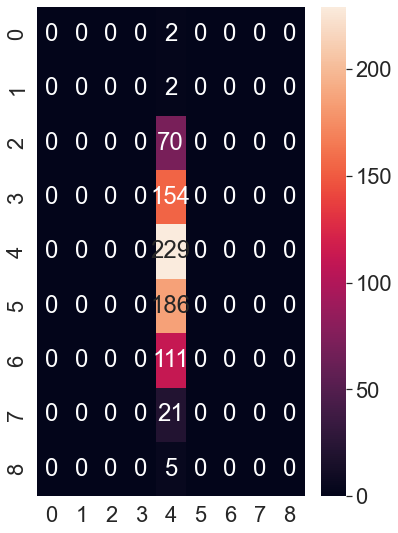

In [25]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True, fmt='g')